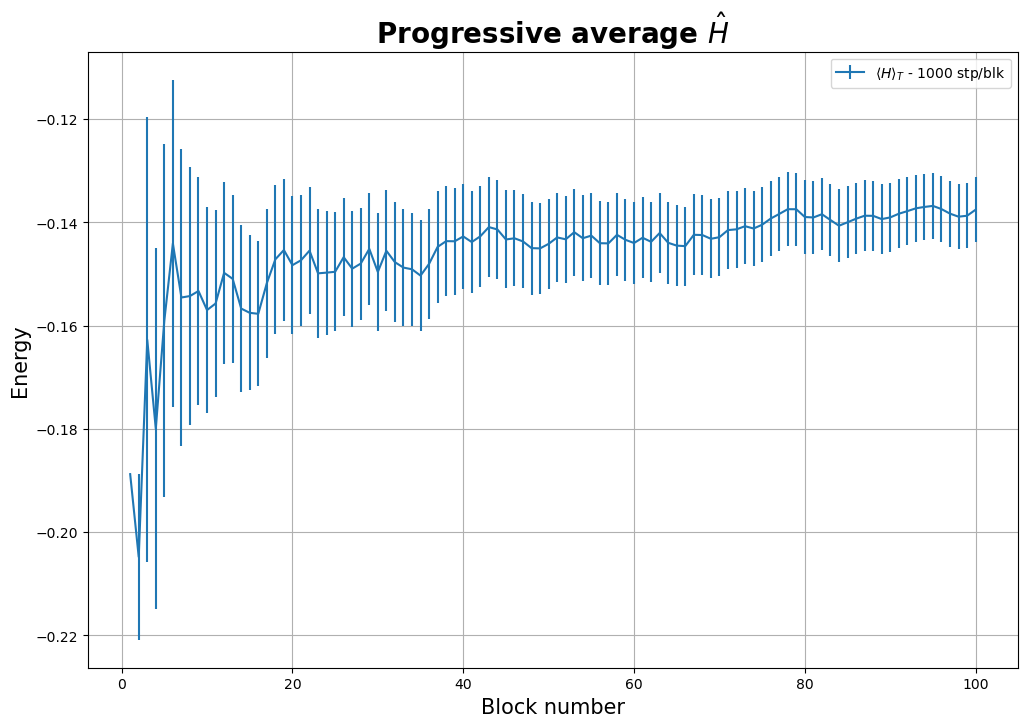

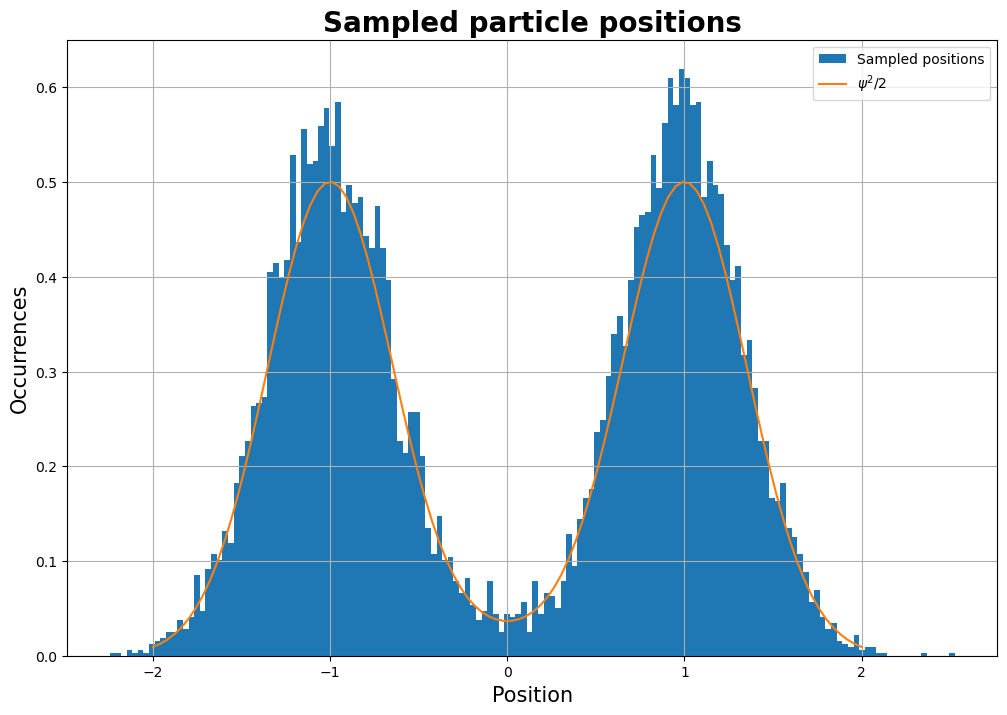

In [75]:
# uso mu, sigma = 1, 0.5

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

N = 100
x = np.arange(N)+1      # uso l'ordinamento da 1 a N

plt.figure(figsize = (12,8))


pos, ave, err = np.loadtxt("./H/result.out", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x, ave, yerr = err, label = r"$\langle H\rangle_T$ - 1000 stp/blk") 

plt.ylabel('Energy', fontsize = 15)
plt.xlabel('Block number', fontsize = 15)
plt.grid(True)
#plt.ylim(-0.525,-0.375)
#plt.axhline(y=-0.46, color = 'r', linestyle = '-')
plt.title('Progressive average $\hat{H}$', fontsize = 20, fontweight = "bold")
plt.legend()

plt.show()

#---------------------------------------

plt.figure(figsize = (12,8))

histofill_blk = 1000                  # numero di posizioni salvate per blocco (cfr input.dat)
x = np.linspace(-2,2,100)      # uso l'ordinamento da 1 a N

mu = 1
sgm = 0.5
def f(x):
   return np.e**((-(x-mu)**2)/(2*sgm**2)) + np.e**((-(x+mu)**2)/(2*sgm**2))

pos = np.loadtxt("./H/pos.out", usecols=(0), delimiter=' ', unpack='true')
plt.hist(pos, 150, density = "true", label = "Sampled positions")
plt.plot(x,f(x)**2/2, label = "$\psi^2/2$")
plt.ylabel('Occurrences', fontsize = 15)
plt.xlabel('Position', fontsize = 15)
plt.title("Sampled particle positions", fontsize = 20, fontweight = "bold")
plt.grid(True)
plt.legend()

plt.show()

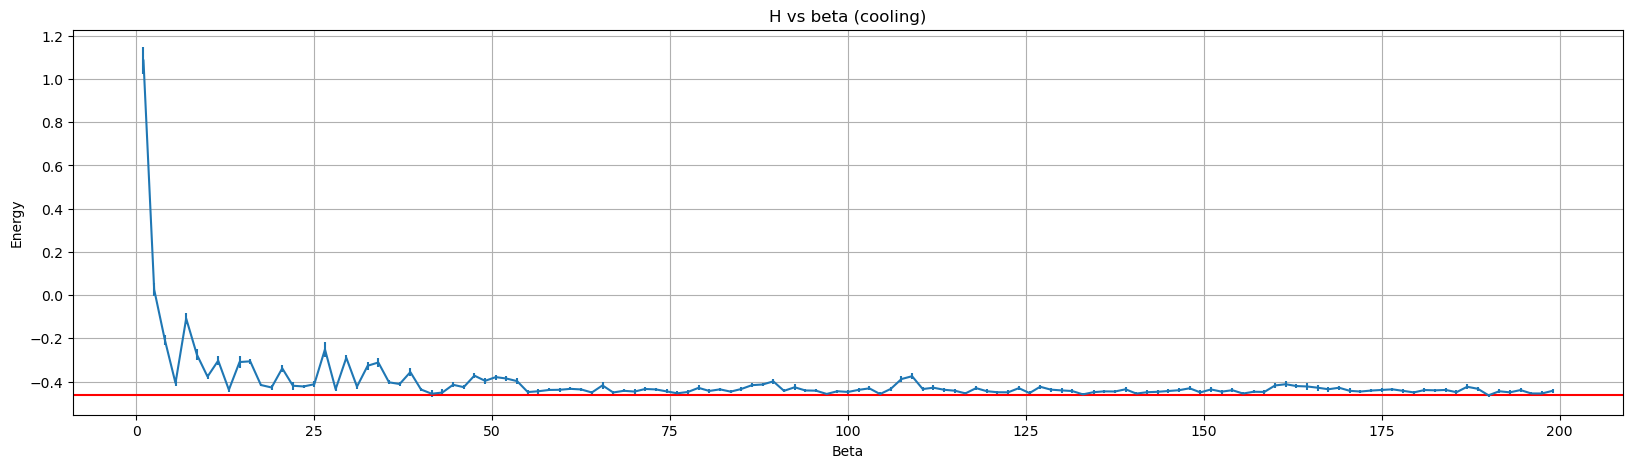

In [76]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

N = 100
x = np.arange(N)+1      # uso l'ordinamento da 1 a N

fig=plt.figure(figsize = (20,5))
beta, mu, sgm, H, errH = np.loadtxt("./SA/traj.out", usecols=(0,1,2,3,4), delimiter=' ', unpack='true')
plt.errorbar(beta, H, errH)

plt.ylabel('Energy')
plt.xlabel('Beta')
plt.grid(True)
plt.axhline(y=-0.46, color = 'r', linestyle = '-')
plt.title('H vs beta (cooling)')
#plt.legend()

plt.show()

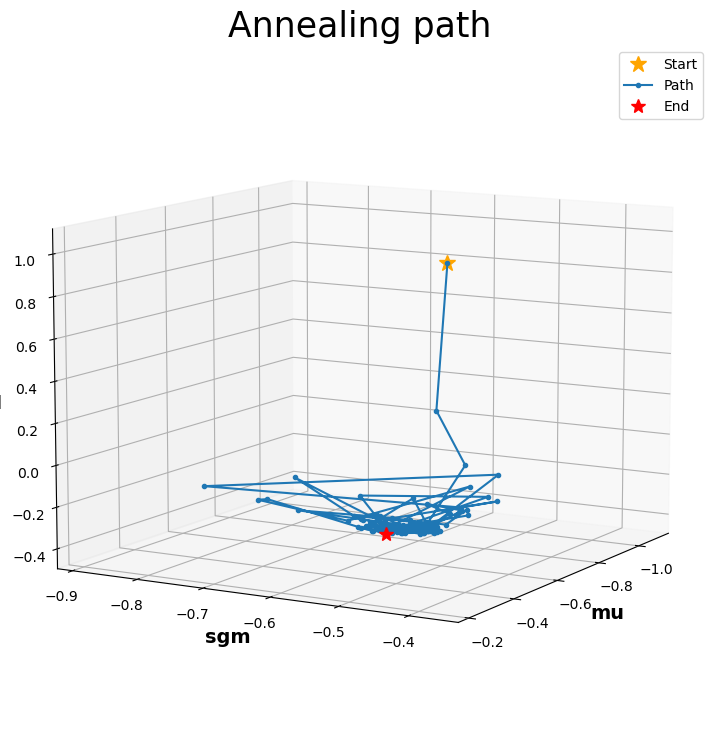

In [77]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (7,7))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

ax.plot(mu[0], sgm[0], H[0], marker='*', markersize = 12, color = "orange", label = "Start", linestyle = "")
ax.plot(mu, sgm, H, marker='.', linestyle = "-", label = "Path")
ax.plot(-0.74, -0.63, -0.45, marker='*', markersize = 10, color = "r", label = "End", linestyle = "")
ax.set_xlabel('mu', fontweight = "bold", fontsize = 14)
ax.set_ylabel('sgm', fontweight = "bold", fontsize = 14)
ax.set_zlabel('H', fontweight ="bold", fontsize = 14)
plt.title("Annealing path", fontsize = 25)
ax.legend()

ax.view_init(10, 30)
plt.show()

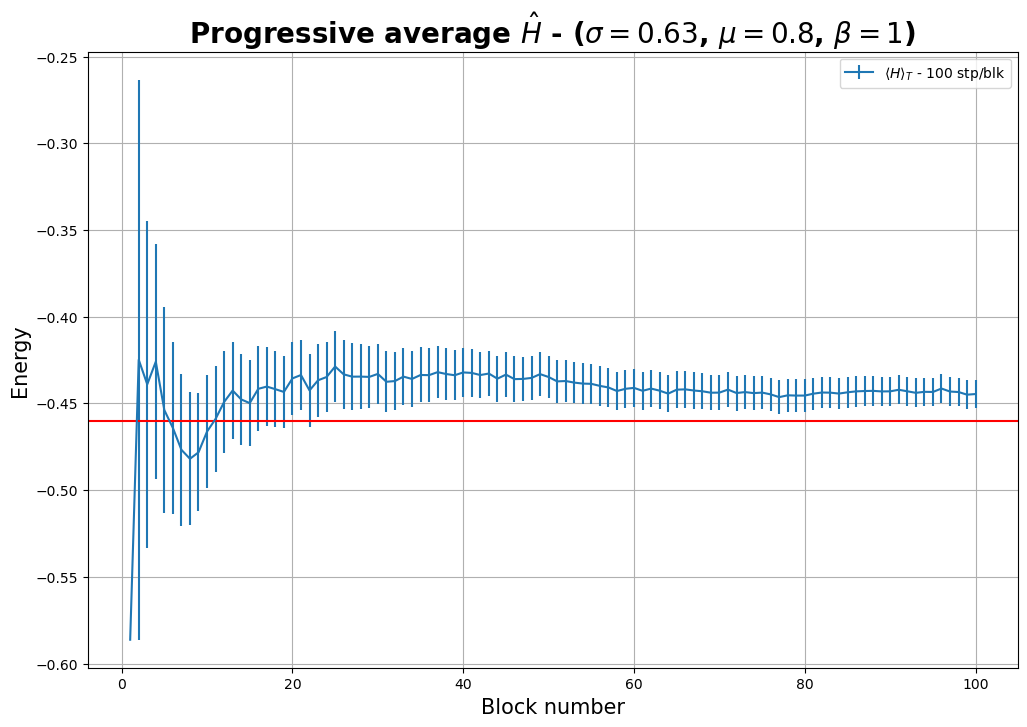

In [78]:
# uso mu, sigma = 0.8, 0.63, beta = 1

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

N = 100
x = np.arange(N)+1      # uso l'ordinamento da 1 a N

plt.figure(figsize = (12,8))

pos, ave, err = np.loadtxt("./SA/result.out", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x, ave, yerr = err, label = r"$\langle H\rangle_T$ - 100 stp/blk") 
plt.ylabel('Energy', fontsize = 15)
plt.xlabel('Block number', fontsize = 15)
plt.grid(True)
plt.title(r'Progressive average $\hat{H}$ - ($\sigma=0.63$, $\mu=0.8$, $\beta=1$)', fontsize = 20, fontweight = "bold")
plt.axhline(y=-0.46, color = 'r', linestyle = '-')
plt.legend()

plt.show()

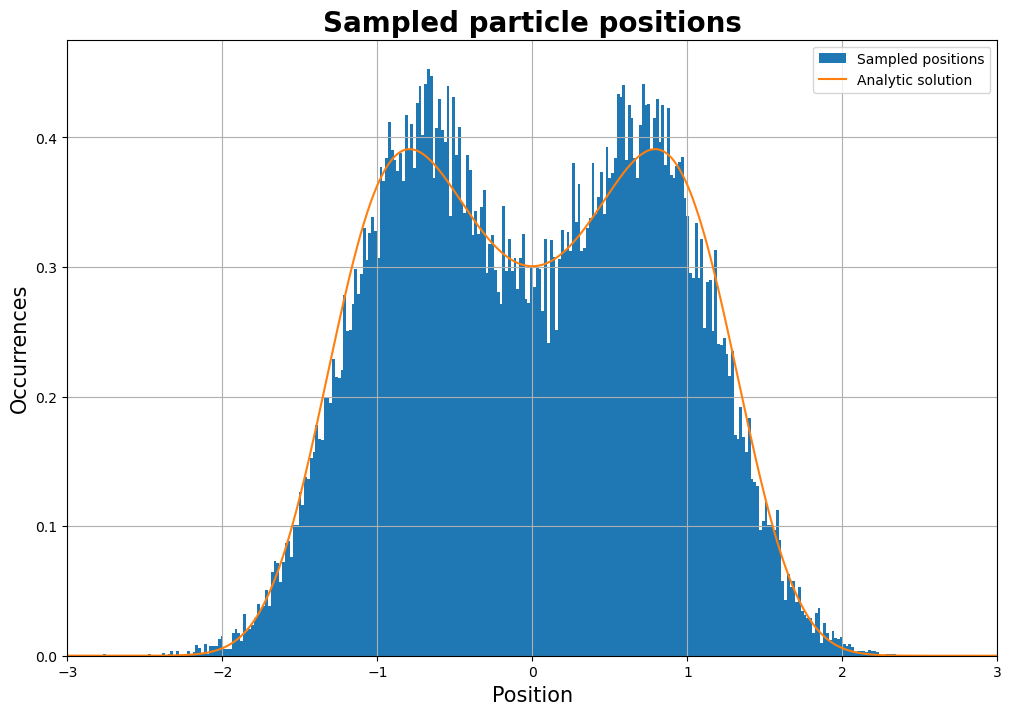

In [79]:
# uso mu, sigma = 0.8, 0.63, beta=1

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

N = 100

#---------------------------------------

plt.figure(figsize = (12,8))

histofill_blk = 10000                  # numero di posizioni salvate per blocco (cfr input.dat)
x = np.linspace(-3,3,50)      # uso l'ordinamento da 1 a N

mu = 0.8
sgm = 0.6
def f(x):
   return np.e**((-(x-mu)**2)/(2*sgm**2)) + np.e**((-(x+mu)**2)/(2*sgm**2))

pos = np.loadtxt("./SA/pos.out", usecols=(0), delimiter=' ', unpack='true')
plt.hist(pos, 300, density = "true", label = "Sampled positions")
#plt.plot(x,f(x)**2/np.e, label = "$\psi^2/e$")
plt.ylabel('Occurrences', fontsize = 15)
plt.xlabel('Position', fontsize = 15)
plt.title("Sampled particle positions", fontsize = 20, fontweight = "bold")
plt.grid(True)
plt.legend()

#-------------Analytic solution-----------------

def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

# Plot a few things
scale = 0.3
plt.plot(x,(psi[0])**2, label='Analytic solution')
plt.xlim(-3,+3)
plt.legend()


plt.show()